# IRIS classification

- https://en.wikipedia.org/wiki/Iris_flower_data_set
- Catogorical/Tabular Numerical Data

In [29]:
import numpy as np
import sklearn.datasets # scikit-learn
import matplotlib.pyplot as plt

In [30]:
!pip install scikit-learn

## many ways to get IRIS dataset

In [31]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
iris = sklearn.datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [33]:
data = iris.data
target = iris.target
data.shape, iris.target_names, len(iris.target_names)

((150, 4), array(['setosa', 'versicolor', 'virginica'], dtype='<U10'), 3)

## EDA

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


<Figure size 2400x1600 with 0 Axes>

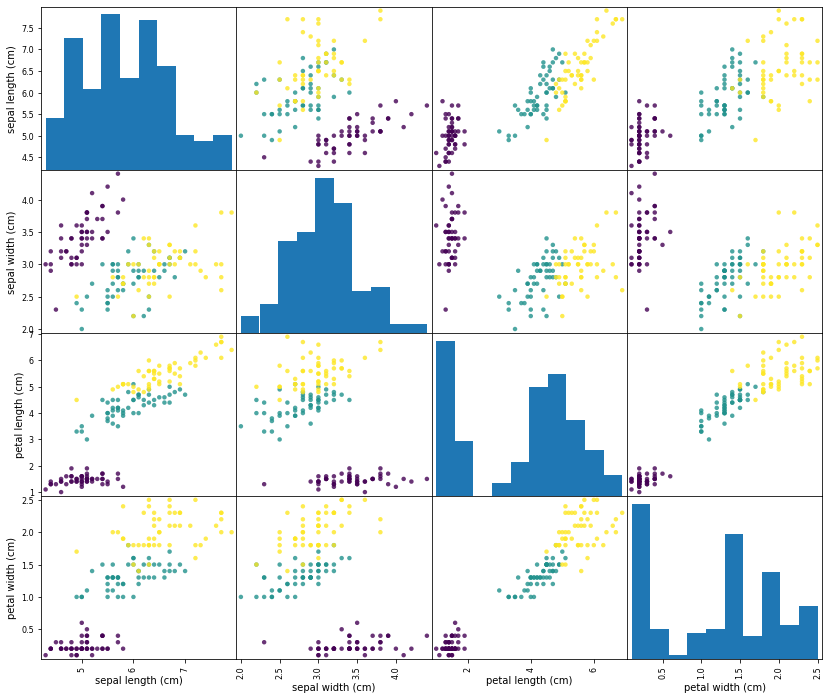

In [34]:
import pandas as pd
from pandas.plotting import scatter_matrix
#creating data frame for pandas
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print(df.head())

#ploting scatter graph of species comparing all features to each other
plt.figure(dpi=400)
scatter_matrix(df, c=iris['target'],marker='o', s=20, alpha=.8, figsize=(14,12))
plt.show()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


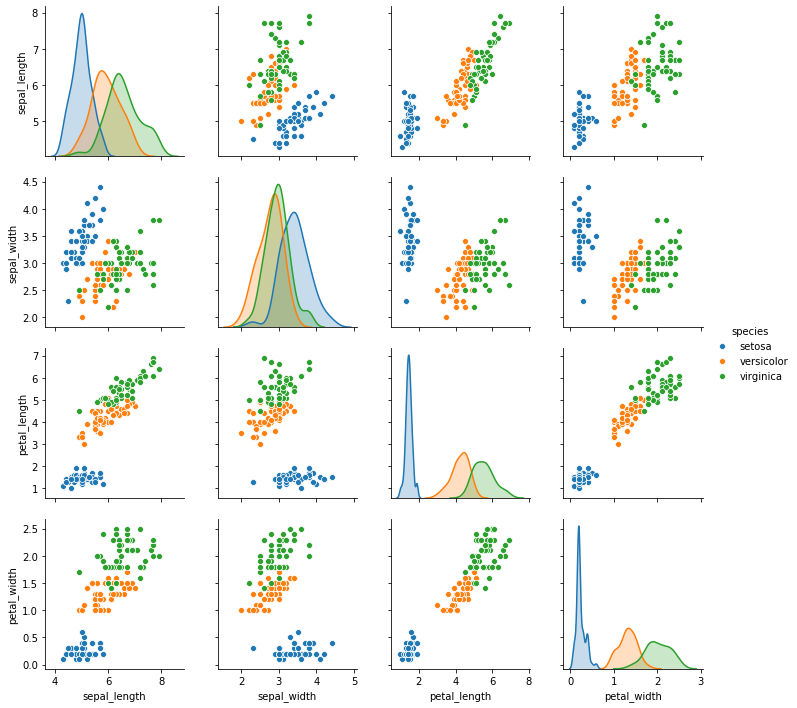

In [35]:
import seaborn as sns
df = sns.load_dataset('iris')
print(df.head())
sns.pairplot(df, hue="species")

## Gaussian Naive Bayes from `sklearn`

- Features are assumed to be iid samples from Gaussian Distribution
- Gaussian parameters (mean, var) of each feature are computed based on training data
- Inference is performed based on the posterior class probability:
$$
    P(C=c|X) \approx P(X|C=c) P(C=c) \quad \mbox{for each } c \in \mbox{Class Ids} 
$$

In [36]:
# https://scikit-learn.org/stable/modules/naive_bayes.html
# https://github.com/dsgiitr/d2l-pytorch/blob/master/Ch04_The_Preliminaries_A_Crashcourse/Naive_Bayes_Classification.ipynb
# https://scikit-learn.org/stable/modules/mixture.html

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # every feature is assumed to be Gaussian, given the class index is fixed

# load data
#X, y = load_iris(return_X_y=True)
X = iris.data
y = iris.target

# split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

print('X_train: ', X_train.shape, 'X_test: ', X_test.shape)

# model
gnb = GaussianNB()

# fit
gnb.fit(X_train, y_train)

# predict / inference
y_pred = gnb.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print("failure rate = {:.1f}%".format( 100 * (y_test != y_pred).sum() / X_test.shape[0]))

X_train:  (120, 4) X_test:  (30, 4)
Number of mislabeled points out of a total 30 points : 1
failure rate = 3.3%


In [37]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [38]:
# stratify, compare this with/without the option `stratify=y`
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1, 2]), array([40, 40, 40], dtype=int64)),
 (array([0, 1, 2]), array([10, 10, 10], dtype=int64)))

## Neural Network by PyTorch

In [39]:
import torch
import torch.nn as nn
import torch.optim

### Neural Network Design

In [40]:
in_features = X_train.shape[1]
n_data = X_train.shape[0]
n_hidden = 10
n_target = len(iris.target_names)

# Two hidden layer network

net = nn.Sequential(
    nn.Linear(in_features=in_features, out_features=n_hidden),
    nn.Tanh(),
    nn.Linear(in_features=n_hidden, out_features=n_target),
    nn.LogSoftmax(dim=1) # LogSoftmax() + NLLLoss() = CrossEntropyLoss()
    )

net

Sequential(
  (0): Linear(in_features=4, out_features=10, bias=True)
  (1): Tanh()
  (2): Linear(in_features=10, out_features=3, bias=True)
  (3): LogSoftmax()
)

In [41]:
# data for training
xtrain, ytrain = torch.tensor(X_train).float(), torch.tensor(y_train).long()
xval, yval = torch.tensor(X_test).float(), torch.tensor(y_test).long()
#
xtrain.dtype, xtrain.shape, ytrain.dtype, ytrain.shape

(torch.float32, torch.Size([120, 4]), torch.int64, torch.Size([120]))

In [42]:
# net working test
with torch.no_grad():
    yp = net(xtrain[:5])
    
indx_pred = torch.argmax(yp, dim=1)

print ('target names: ', iris.target_names)
for i in range(yp.shape[0]):
    print ('yp: ', yp[i], 'argmax: ', indx_pred[i], ' predicted: ', iris.target_names[indx_pred[i]])

target names:  ['setosa' 'versicolor' 'virginica']
yp:  tensor([-1.0099, -0.7425, -1.8336]) argmax:  tensor(1)  predicted:  versicolor
yp:  tensor([-1.0043, -0.7465, -1.8346]) argmax:  tensor(1)  predicted:  versicolor
yp:  tensor([-0.9846, -0.7714, -1.8074]) argmax:  tensor(1)  predicted:  versicolor
yp:  tensor([-0.9561, -0.7909, -1.8191]) argmax:  tensor(1)  predicted:  versicolor
yp:  tensor([-0.9301, -0.7660, -1.9617]) argmax:  tensor(1)  predicted:  versicolor


### Optimizer & Loss Function

- `LogSoftMax()` + `NLLLoss()` = simply choose the one based on the target label and update it only.
- This is equal to `CrossEntropyLoss()`

In [43]:
optimizer = torch.optim.SGD(net.parameters(), lr=1e-3)
loss_fn = nn.NLLLoss()

### Training Loop

In [44]:
def accuracy(pred, target, txt):
    comp = torch.argmax(pred, dim=1)  == target
    ncorrect = comp.sum()
    acc = ncorrect / float(len(pred))
#     if txt is not None:
#         print(f'{txt}: {comp}, {ncorrect}, {target}, {acc}')
    return acc

def training_loop(n_epochs, optim, model, loss_fn, xtrain, ytrain, xval, yval):
    tloss, tacc, vloss, vacc = [], [], [], []
    for epoch in range(1, n_epochs+1):
        ypred = model(xtrain)
        loss_train = loss_fn(ypred, ytrain)
        
        optim.zero_grad()
        loss_train.backward()
        optim.step()
        
        with torch.no_grad():
            yval_pred = model(xval)
            loss_val = loss_fn(yval_pred, yval)

        # accuracy computation
        with torch.no_grad():
            acc_t = accuracy(ypred, ytrain, 'train')
            acc_v = accuracy(yval_pred, yval, 'validation')
        
        if epoch == 1 or epoch % 2000 == 0:
            print(f'Epoch {epoch}, tloss {loss_train:.2f} t_acc: {acc_t:.2f}  vloss {loss_val:.2f}  v_acc: {acc_v:.2f}')
            
        # record for history return
        tloss.append(loss_train.item())
        vloss.append(loss_val.item())
        tacc.append(acc_t.item())
        vacc.append(acc_v.item())
        
    print ('finished.')
    return {'tloss': tloss, 'tacc': tacc, 'vloss': vloss, 'vacc': vacc}

In [45]:
history = training_loop(n_epochs=30000,
             optim=optimizer,
             model=net,
             loss_fn=loss_fn,
             xtrain=xtrain, ytrain=ytrain,
             xval=xval, yval=yval)

Epoch 1, tloss 1.25 t_acc: 0.32  vloss 1.25  v_acc: 0.33
Epoch 2000, tloss 0.83 t_acc: 0.65  vloss 0.83  v_acc: 0.63
Epoch 4000, tloss 0.63 t_acc: 0.71  vloss 0.62  v_acc: 0.60
Epoch 6000, tloss 0.55 t_acc: 0.75  vloss 0.55  v_acc: 0.70
Epoch 8000, tloss 0.51 t_acc: 0.82  vloss 0.52  v_acc: 0.77
Epoch 10000, tloss 0.49 t_acc: 0.90  vloss 0.49  v_acc: 0.87
Epoch 12000, tloss 0.45 t_acc: 0.93  vloss 0.45  v_acc: 0.97
Epoch 14000, tloss 0.42 t_acc: 0.95  vloss 0.41  v_acc: 1.00
Epoch 16000, tloss 0.37 t_acc: 0.98  vloss 0.36  v_acc: 1.00
Epoch 18000, tloss 0.33 t_acc: 0.98  vloss 0.31  v_acc: 1.00
Epoch 20000, tloss 0.29 t_acc: 0.98  vloss 0.26  v_acc: 1.00
Epoch 22000, tloss 0.26 t_acc: 0.98  vloss 0.22  v_acc: 1.00
Epoch 24000, tloss 0.23 t_acc: 0.98  vloss 0.19  v_acc: 1.00
Epoch 26000, tloss 0.20 t_acc: 0.98  vloss 0.17  v_acc: 1.00
Epoch 28000, tloss 0.19 t_acc: 0.98  vloss 0.15  v_acc: 1.00
Epoch 30000, tloss 0.17 t_acc: 0.98  vloss 0.13  v_acc: 1.00
finished.


In [16]:
yt = torch.argmax(net(xtrain), dim=1)
yt, ytrain

(tensor([0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 0, 1, 1, 0, 2, 0, 0, 2,
         2, 1, 1, 0, 2, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 2,
         1, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 2, 0, 0, 2, 1, 1,
         0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0,
         1, 1, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1, 2, 0, 2, 2, 0, 1, 1, 2, 0, 2, 2, 2]),
 tensor([0, 0, 0, 0, 1, 0, 2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 0, 1, 1, 0, 2, 0, 0, 2,
         2, 1, 1, 0, 2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 2,
         1, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 2, 0, 0, 2, 1, 1,
         0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0,
         1, 1, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 2, 2]))

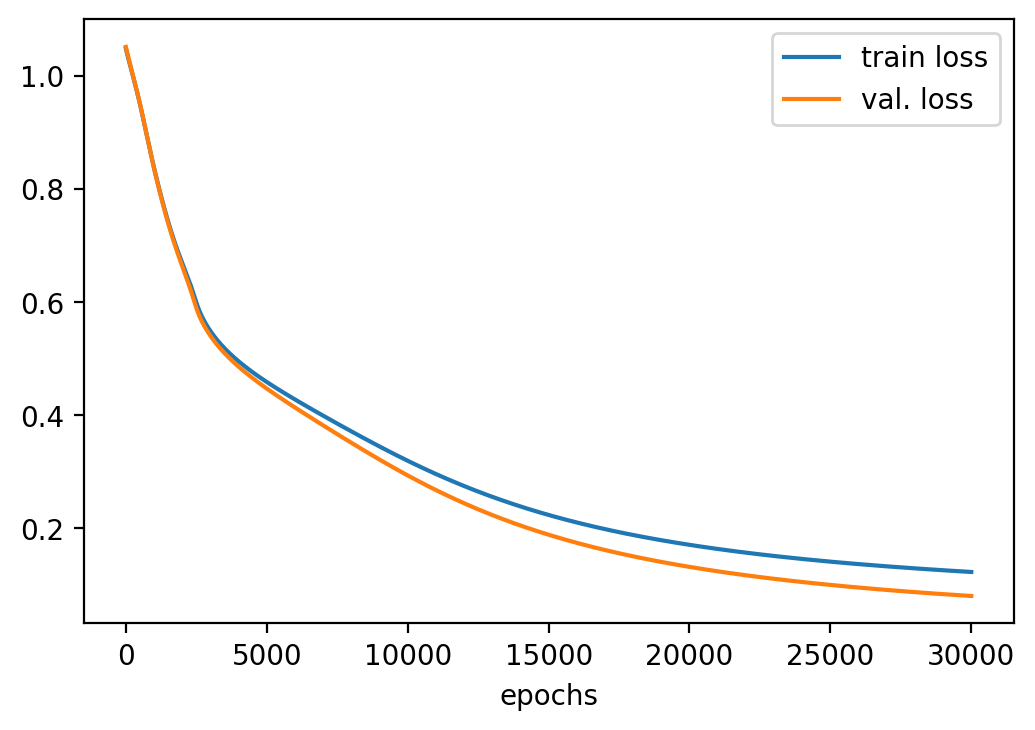

In [17]:
plt.figure(dpi=200)
plt.plot(history['tloss'], label='train loss')
plt.plot(history['vloss'], label='val. loss')
plt.xlabel('epochs')
plt.legend()

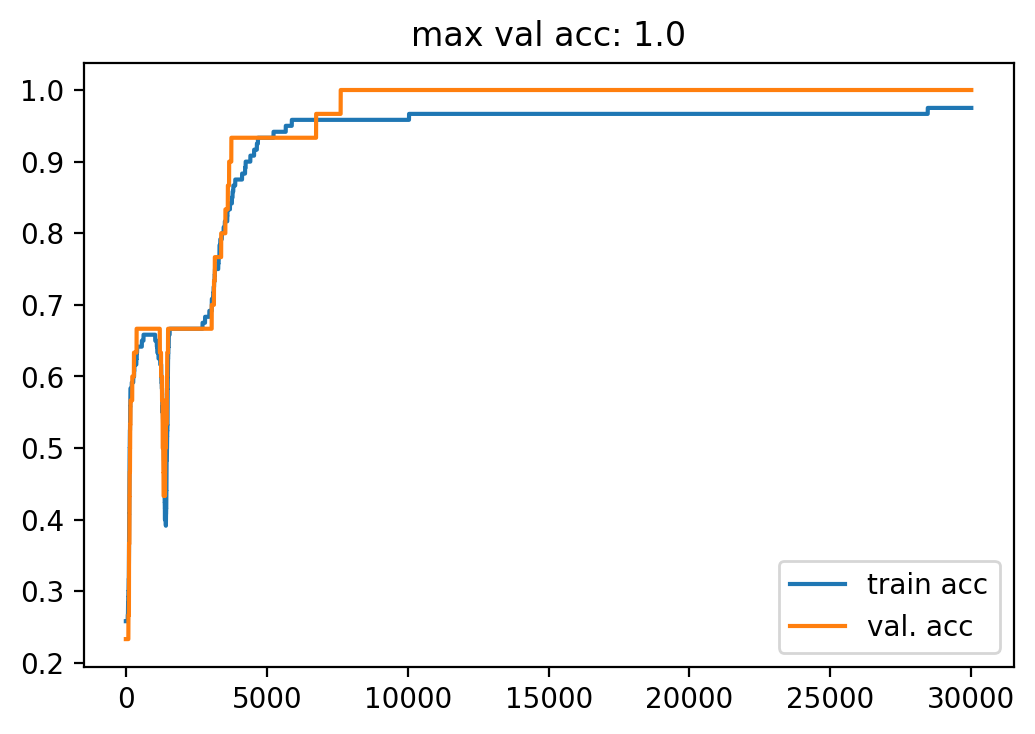

In [18]:
plt.figure(dpi=200)
plt.plot(history['tacc'], label='train acc')
plt.plot(history['vacc'], label='val. acc')
mvacc = max(history['vacc'])
plt.title(f'max val acc: {mvacc}')
plt.legend()

### Don't believe it too much!